In [1]:
# Import statements

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from dataprep.eda import plot, plot_correlation, plot_missing

NumExpr defaulting to 8 threads.


In [2]:
df = pd.read_csv("MLS_clean_data.csv")

/Applications/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df.head()

Unnamed: 0    MLS No How Sold    Zip     City           Address  \
0          32  40657326     Cash  94621  oakland     1030 76th ave   
1          35  40658443     Cash  94603  oakland      472 hale ave   
2          40  40645598     Cash  94603  oakland  10806 apricot st   
3          43  40640583     Cash  94621  oakland     1116 71st ave   
4          46  40647858     Cash  94621  oakland    5635 holway st   

            Input Date            List Date         Pending Date  \
0  2014-05-13 12:25:00  2014-05-13 00:00:00  2014-06-12 00:00:00   
1  2014-05-21 09:16:00  2014-05-21 00:00:00  2014-08-09 00:00:00   
2  2014-02-10 21:27:00  2014-01-26 00:00:00  2014-04-13 00:00:00   
3  2013-12-12 11:22:00  2013-12-12 00:00:00  2014-05-09 00:00:00   
4  2014-03-03 11:53:00  2014-03-03 00:00:00  2014-03-12 00:00:00   

          Closing Date  ...  Lot SqFt  Garage (Y/N)    Age  Picture Count  \
0  2014-07-22 00:00:00  ...    2500.0           0.0   66.0              1   
1  2014-08-18 00:00:00  ...    3800.0           0.0  104.0              1   
2  2014-04-23 00:00:00  ...    2500.0           1.0   66.0              9   
3  2014-06-11 00:00:00  ...    3100.0           1.0  102.0             12   
4  2014-03-12 00:00:00  ...    1680.0           1.0   88.0              3   

                           Confidential Remarks 1000  \
0   ind probate sale. pls use probate purch agrmt...   
1  contractor special, cash only, will not qualif...   
2  vacant/ leave mssg for agent & show!! (925) 92...   
3  contractors special!!! regular sale.  as of th...   
4  drive by till 3/6. lockbox installed on 3/6. e...   

                                      Public Remarks  Media Link  \
0  attention contractors, investors and handy-peo...           0   
1  seller has plans and city approval for a 3 bed...           0   
2  fixer!! property needs lots of work but has gr...           0   
3  contractors special!!! nice bungalow located i...           0   
4  no short sale or reo. east oakland fixer with ...           0   

   days_on_market  days_on_MLS year_sold  
0              30           29      2014  
1              80           79      2014  
2              77           61      2014  
3             148          147      2014  
4               9            8      2014  

[5 rows x 25 columns]

In [4]:
df.drop(['Unnamed: 0'],axis =1, inplace=True)

In [5]:
df.head()

MLS No How Sold    Zip     City           Address           Input Date  \
0  40657326     Cash  94621  oakland     1030 76th ave  2014-05-13 12:25:00   
1  40658443     Cash  94603  oakland      472 hale ave  2014-05-21 09:16:00   
2  40645598     Cash  94603  oakland  10806 apricot st  2014-02-10 21:27:00   
3  40640583     Cash  94621  oakland     1116 71st ave  2013-12-12 11:22:00   
4  40647858     Cash  94621  oakland    5635 holway st  2014-03-03 11:53:00   

             List Date         Pending Date         Closing Date  List Price  \
0  2014-05-13 00:00:00  2014-06-12 00:00:00  2014-07-22 00:00:00     49999.0   
1  2014-05-21 00:00:00  2014-08-09 00:00:00  2014-08-18 00:00:00     79500.0   
2  2014-01-26 00:00:00  2014-04-13 00:00:00  2014-04-23 00:00:00    114000.0   
3  2013-12-12 00:00:00  2014-05-09 00:00:00  2014-06-11 00:00:00     99900.0   
4  2014-03-03 00:00:00  2014-03-12 00:00:00  2014-03-12 00:00:00     99800.0   

   ...  Lot SqFt  Garage (Y/N)    Age  Picture Count  \
0  ...    2500.0           0.0   66.0              1   
1  ...    3800.0           0.0  104.0              1   
2  ...    2500.0           1.0   66.0              9   
3  ...    3100.0           1.0  102.0             12   
4  ...    1680.0           1.0   88.0              3   

                           Confidential Remarks 1000  \
0   ind probate sale. pls use probate purch agrmt...   
1  contractor special, cash only, will not qualif...   
2  vacant/ leave mssg for agent & show!! (925) 92...   
3  contractors special!!! regular sale.  as of th...   
4  drive by till 3/6. lockbox installed on 3/6. e...   

                                      Public Remarks  Media Link  \
0  attention contractors, investors and handy-peo...           0   
1  seller has plans and city approval for a 3 bed...           0   
2  fixer!! property needs lots of work but has gr...           0   
3  contractors special!!! nice bungalow located i...           0   
4  no short sale or reo. east oakland fixer with ...           0   

   days_on_market days_on_MLS year_sold  
0              30          29      2014  
1              80          79      2014  
2              77          61      2014  
3             148         147      2014  
4               9           8      2014  

[5 rows x 24 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115751 entries, 0 to 115750
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   MLS No                     115751 non-null  object 
 1   How Sold                   115751 non-null  object 
 2   Zip                        115751 non-null  object 
 3   City                       115751 non-null  object 
 4   Address                    115751 non-null  object 
 5   Input Date                 115751 non-null  object 
 6   List Date                  115751 non-null  object 
 7   Pending Date               115751 non-null  object 
 8   Closing Date               115751 non-null  object 
 9   List Price                 115751 non-null  float64
 10  Sold Price                 115751 non-null  float64
 11  BR                         115751 non-null  float64
 12  Bth                        115751 non-null  float64
 13  SqFt                       11

In [8]:
#Converting date variable to datetime var
date_vars = ['Input Date', 'List Date', 'Pending Date', 'Closing Date']

for var in date_vars:
    df[var] = pd.to_datetime(df[var], yearfirst=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115751 entries, 0 to 115750
Data columns (total 24 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   MLS No                     115751 non-null  object        
 1   How Sold                   115751 non-null  object        
 2   Zip                        115751 non-null  object        
 3   City                       115751 non-null  object        
 4   Address                    115751 non-null  object        
 5   Input Date                 115751 non-null  datetime64[ns]
 6   List Date                  115751 non-null  datetime64[ns]
 7   Pending Date               115751 non-null  datetime64[ns]
 8   Closing Date               115751 non-null  datetime64[ns]
 9   List Price                 115751 non-null  float64       
 10  Sold Price                 115751 non-null  float64       
 11  BR                         115751 non-null  float64 

In [12]:
df.describe()

List Price    Sold Price             BR            Bth  \
count  1.157510e+05  1.157510e+05  115751.000000  115751.000000   
mean   8.447318e+05  8.932229e+05       3.370278       2.080829   
std    5.059910e+05  5.136387e+05       0.918417       0.823540   
min    1.000000e+00  2.400000e+03       0.000000       0.000000   
25%    5.490000e+05  5.690000e+05       3.000000       2.000000   
50%    7.490000e+05  7.850000e+05       3.000000       2.000000   
75%    9.990000e+05  1.100000e+06       4.000000       2.000000   
max    4.599000e+07  2.050000e+07      17.000000      15.000000   

                SqFt      Lot SqFt   Garage (Y/N)            Age  \
count  115751.000000  1.157510e+05  115751.000000  115751.000000   
mean     1839.007896  1.438613e+05       0.841392      56.759449   
std       883.604218  8.711502e+06       0.365311      29.511321   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%      1247.500000  4.500000e+03       1.000000      34.000000   
50%      1628.000000  5.850000e+03       1.000000      57.000000   
75%      2175.000000  7.500000e+03       1.000000      77.000000   
max     52272.000000  1.790185e+09       1.000000     200.000000   

       Picture Count     Media Link  days_on_market    days_on_MLS  \
count  115751.000000  115751.000000   115751.000000  115751.000000   
mean       20.821790       0.417638       25.349034      23.611805   
std        11.632118       0.493172       34.554652      34.911978   
min         0.000000       0.000000        0.000000    -513.000000   
25%        11.000000       0.000000        8.000000       7.000000   
50%        21.000000       0.000000       13.000000      12.000000   
75%        30.000000       1.000000       28.000000      26.000000   
max       135.000000       1.000000      399.000000     398.000000   

           year_sold  
count  115751.000000  
mean     2015.865219  
std         3.285718  
min      2010.000000  
25%      2013.000000  
50%      2016.000000  
75%      2019.000000  
max      2021.000000

<AxesSubplot:xlabel='BR', ylabel='Sold Price'>

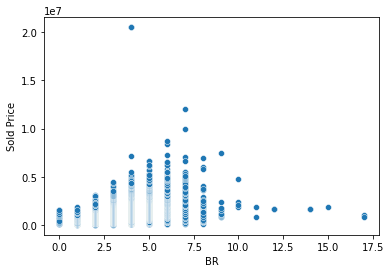

In [11]:
#Scatter plot of number of bedrooms versus sold price
sns.scatterplot(data=df, x="BR", y="Sold Price")

<AxesSubplot:xlabel='BR', ylabel='Sold Price'>

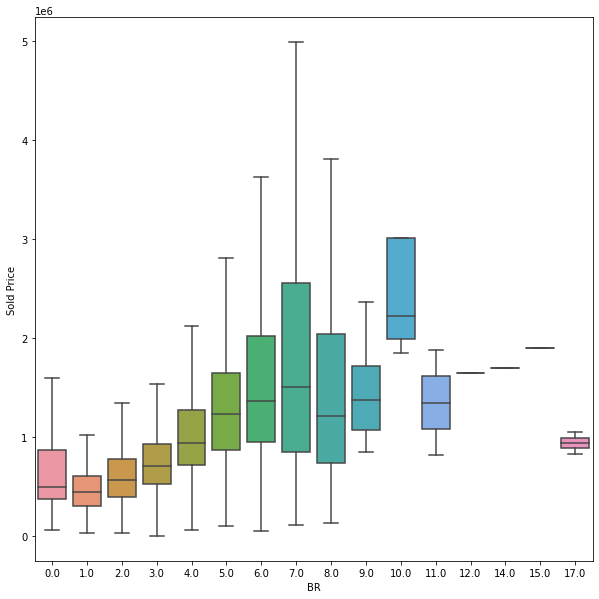

In [94]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.boxplot(data=df, x="BR", y="Sold Price", ax=ax,  showfliers=False)

<AxesSubplot:xlabel='SqFt', ylabel='Sold Price'>

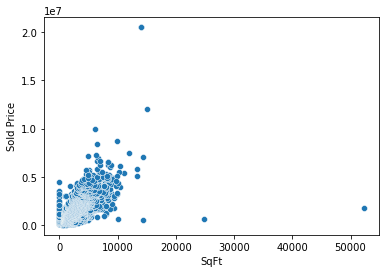

In [13]:
# Scattter plot of house size versuus sold price
sns.scatterplot(data=df, x="SqFt", y="Sold Price")

In [14]:
#Treating outliers
df[df['SqFt'] == 52272]

MLS No How Sold    Zip     City                  Address  \
55311  SF451063     Cash  94619  oakland  12830 skyline boulevard   

               Input Date  List Date Pending Date Closing Date  List Price  \
55311 2016-09-21 17:00:00 2016-09-22   2016-10-05   2016-10-14   1385000.0   

       ...  Lot SqFt  Garage (Y/N)   Age  Picture Count  \
55311  ...       1.0           0.0  58.0             24   

                               Confidential Remarks 1000  \
55311  call gene boomer for alarm code 510-384-8834. ...   

                                          Public Remarks  Media Link  \
55311  sprawling hillcrest estates retreat. mt. diabl...           0   

       days_on_market days_on_MLS year_sold  
55311              13          13      2016  

[1 rows x 24 columns]

In [15]:
df.loc[df['Address']== '12830 skyline boulevard', 'SqFt'] = 3470

In [16]:
df[df['SqFt'] > 20000]

MLS No      How Sold    Zip     City            Address  \
4132  SF414535  Conventional  94536  fremont  1357 mowry avenue   

              Input Date  List Date Pending Date Closing Date  List Price  \
4132 2013-09-28 17:00:00 2013-09-29   2013-12-02   2014-01-31    700000.0   

      ...  Lot SqFt  Garage (Y/N)    Age  Picture Count  \
4132  ...       1.0           0.0  141.0             18   

                              Confidential Remarks 1000  \
4132  house is flagged historical - contact joel pul...   

                                         Public Remarks  Media Link  \
4132  5 bedroom victorian house w/over half acre lot...           1   

      days_on_market days_on_MLS year_sold  
4132              64          64      2013  

[1 rows x 24 columns]

In [17]:
df.loc[df['Address']== '1357 mowry avenue', 'SqFt'] = 2306

In [21]:
df[df['Sold Price'] > 1000000]

MLS No      How Sold    Zip        City               Address  \
7051    40661600  Conventional  94618     oakland        6701 chabot rd   
7052    40657941  Conventional  94610     oakland  1488 trestle glen rd   
7053    40634718  Conventional  94539     fremont    40440 carmelita ct   
7054    40654760  Conventional  94568      dublin      2525 amantea way   
7055    40650758  Conventional  94555     fremont       4670 amiens ave   
...          ...           ...    ...         ...                   ...   
115746  40924553          Cash  94618     oakland      2 westminster dr   
115747  40913071  Conventional  94611    piedmont   305 sheridan avenue   
115748  40923281          Cash  94566  pleasanton        2157 canosa ct   
115749  40907220  Conventional  94618     oakland   6076 manchester dr.   
115750  40950009          Cash  94611    piedmont           39 crest rd   

                Input Date  List Date Pending Date Closing Date  List Price  \
7051   2014-06-12 16:17:00 2014-06-11   2014-06-21   2014-07-16    899000.0   
7052   2014-05-16 14:03:00 2014-05-16   2014-05-22   2014-06-13    789000.0   
7053   2013-10-10 00:09:00 2013-10-10   2013-10-18   2013-11-08    899000.0   
7054   2014-04-24 16:45:00 2014-04-24   2014-05-18   2014-06-17   1038888.0   
7055   2014-03-26 11:40:00 2014-03-24   2014-03-30   2014-04-24    949999.0   
...                    ...        ...          ...          ...         ...   
115746 2020-10-09 10:14:00 2020-10-15   2020-10-22   2021-01-20   5250000.0   
115747 2020-07-18 18:43:00 2020-07-18   2020-08-19   2020-09-16   5995000.0   
115748 2020-10-01 06:13:00 2020-10-22   2020-11-05   2020-12-01   6100000.0   
115749 2020-06-04 12:55:00 2020-06-04   2020-09-27   2020-10-30   6498000.0   
115750 2021-05-14 13:47:00 2021-05-14   2021-05-14   2021-05-14   6625000.0   

        ...  Lot SqFt  Garage (Y/N)    Age  Picture Count  \
7051    ...    4703.0           1.0   62.0             12   
7052    ...    5300.0           1.0   86.0             29   
7053    ...    6000.0           1.0   47.0             27   
7054    ...    9571.0           1.0    2.0              8   
7055    ...    5586.0           1.0   28.0             24   
...     ...       ...           ...    ...            ...   
115746  ...   13125.0           1.0   93.0              1   
115747  ...   16425.0           1.0  113.0              7   
115748  ...   38718.0           1.0   12.0             40   
115749  ...   24197.0           1.0   21.0             40   
115750  ...   28067.0           1.0   91.0              6   

                                Confidential Remarks 1000  \
7051                                                  NaN   
7052    offers due this thursday may 22nd by 3pm.  dis...   
7053    title with fidelity national title email la fo...   
7054    please call agent simon chan 510-377-7873 or e...   
7055    this house has 12'x26' bonus sunroom with perm...   
...                                                   ...   
115746  no show until 10/16.  a/c upstairs and in main...   
115747  bom at no fault of home. listing agent will on...   
115748  disclosure link available upon request. must f...   
115749  neither sellers nor agent have verified or gua...   
115750  for comp purposes only. this property was sold...   

                                           Public Remarks  Media Link  \
7051    custom  built by owner for his family in 1953....           0   
7052    storybook med in the heart of trestle glen. li...           1   
7053    must see total remodel turn key home, remodele...           1   
7054    beautiful 2 yrs new home built in an upscale c...           0   
7055    this highly upgraded, modern & beautiful sfh l...           1   
...                                                   ...         ...   
115746  rare opportunity to call one of claremont pine...           0   
115747  stone walls surround this extraordinary histor...           0   
115748  extraordinary custom ruby hil

<AxesSubplot:xlabel='SqFt', ylabel='Sold Price'>

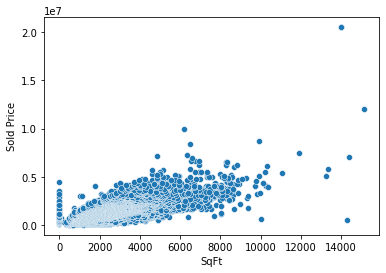

In [22]:
sns.scatterplot(data=df, x="SqFt", y="Sold Price")

In [23]:
df.describe()

List Price    Sold Price             BR            Bth  \
count  1.157510e+05  1.157510e+05  115751.000000  115751.000000   
mean   8.447318e+05  8.932229e+05       3.370278       2.080829   
std    5.059910e+05  5.136387e+05       0.918417       0.823540   
min    1.000000e+00  2.400000e+03       0.000000       0.000000   
25%    5.490000e+05  5.690000e+05       3.000000       2.000000   
50%    7.490000e+05  7.850000e+05       3.000000       2.000000   
75%    9.990000e+05  1.100000e+06       4.000000       2.000000   
max    4.599000e+07  2.050000e+07      17.000000      15.000000   

                SqFt      Lot SqFt   Garage (Y/N)            Age  \
count  115751.000000  1.157510e+05  115751.000000  115751.000000   
mean     1838.391228  1.438613e+05       0.841392      56.759449   
std       868.457736  8.711502e+06       0.365311      29.511321   
min         0.000000  0.000000e+00       0.000000       0.000000   
25%      1247.500000  4.500000e+03       1.000000      34.000000   
50%      1628.000000  5.850000e+03       1.000000      57.000000   
75%      2175.000000  7.500000e+03       1.000000      77.000000   
max     15119.000000  1.790185e+09       1.000000     200.000000   

       Picture Count     Media Link  days_on_market    days_on_MLS  \
count  115751.000000  115751.000000   115751.000000  115751.000000   
mean       20.821790       0.417638       25.349034      23.611805   
std        11.632118       0.493172       34.554652      34.911978   
min         0.000000       0.000000        0.000000    -513.000000   
25%        11.000000       0.000000        8.000000       7.000000   
50%        21.000000       0.000000       13.000000      12.000000   
75%        30.000000       1.000000       28.000000      26.000000   
max       135.000000       1.000000      399.000000     398.000000   

           year_sold  
count  115751.000000  
mean     2015.865219  
std         3.285718  
min      2010.000000  
25%      2013.000000  
50%      2016.000000  
75%      2019.000000  
max      2021.000000

In [24]:
#Treating outliers
df['Sold Price'].max()

20500000.0

In [25]:
df[df['Sold Price'] == 20500000]

MLS No How Sold    Zip     City         Address  \
64282  BA21505049    Other  94705  oakland  6889 devon way   
64283    40676479     Cash  94705  oakland  6889 devon way   

               Input Date  List Date Pending Date Closing Date  List Price  \
64282 2015-03-08 17:00:00 2015-03-09   2015-11-18   2016-01-05  21000000.0   
64283 2014-10-06 10:26:00 2014-10-06   2015-10-28   2016-01-05  21000000.0   

       ...  Lot SqFt  Garage (Y/N)   Age  Picture Count  \
64282  ...  788305.0           0.0  22.0             21   
64283  ...  871200.0           1.0  17.0             30   

                               Confidential Remarks 1000  \
64282  www.feltonestate.com for additional photos and...   
64283  sold price included adjoining vacant land owne...   

                                          Public Remarks  Media Link  \
64282  with a striking modernist design inspired by t...           1   
64283  striking modernist design inspired by frank ll...           0   

       days_on_market days_on_MLS year_sold  
64282             254         254      2015  
64283             387         386      2015  

[2 rows x 24 columns]

In [26]:
df.drop(df.index[df['Address'] =='6889 devon way'], inplace = True)

<AxesSubplot:xlabel='SqFt', ylabel='Sold Price'>

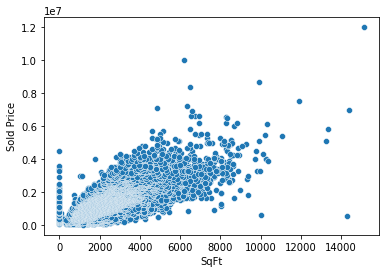

In [27]:
sns.scatterplot(data=df, x="SqFt", y="Sold Price")

In [33]:
df['List Price'].max()

45990000.0

In [34]:
df[df['List Price'] == 45990000]

MLS No    How Sold    Zip    City          Address  \
38384  BA21128361  Government  94568  dublin  8037 galaxy way   

               Input Date  List Date Pending Date Closing Date  List Price  \
38384 2011-10-30 17:00:00 2011-10-31   2011-12-16   2012-01-31  45990000.0   

       ...  Lot SqFt  Garage (Y/N)   Age  Picture Count  \
38384  ...       0.0           0.0  21.0              5   

       Confidential Remarks 1000  \
38384                        NaN   

                                          Public Remarks  Media Link  \
38384  gorgoous newer home, fully remodeled, new kitc...           0   

       days_on_market days_on_MLS year_sold  
38384              46          46      2011  

[1 rows x 24 columns]

In [35]:
df.loc[df['Address']== '8037 galaxy way', 'List Price'] = 459900

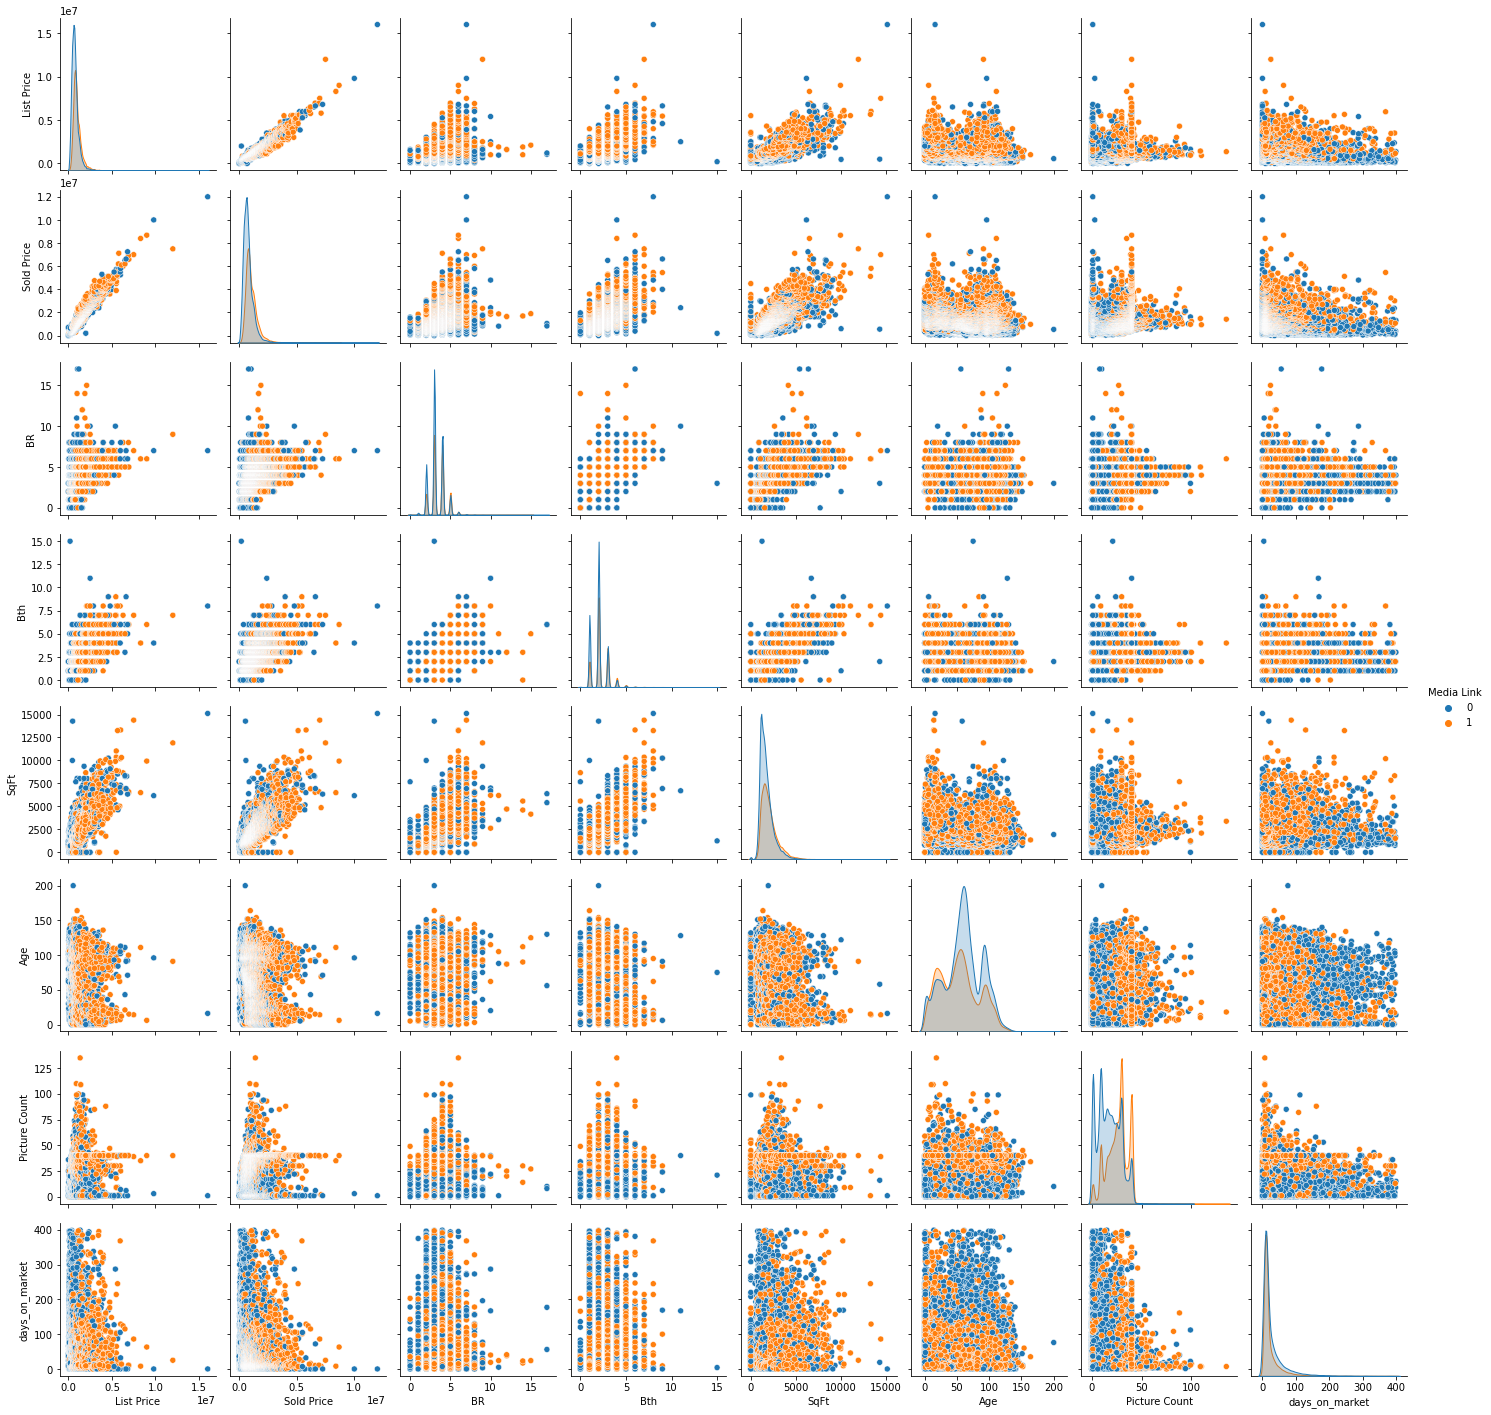

In [36]:
#Pair scatter plots, grouping by whether the listing had a media link

pairplot_vars = ['List Price', 'Sold Price', 'BR', 'Bth', 'SqFt', 'Age', 'Picture Count', 'days_on_market']

sns.pairplot(df, vars = pairplot_vars, hue = 'Media Link')

<AxesSubplot:>

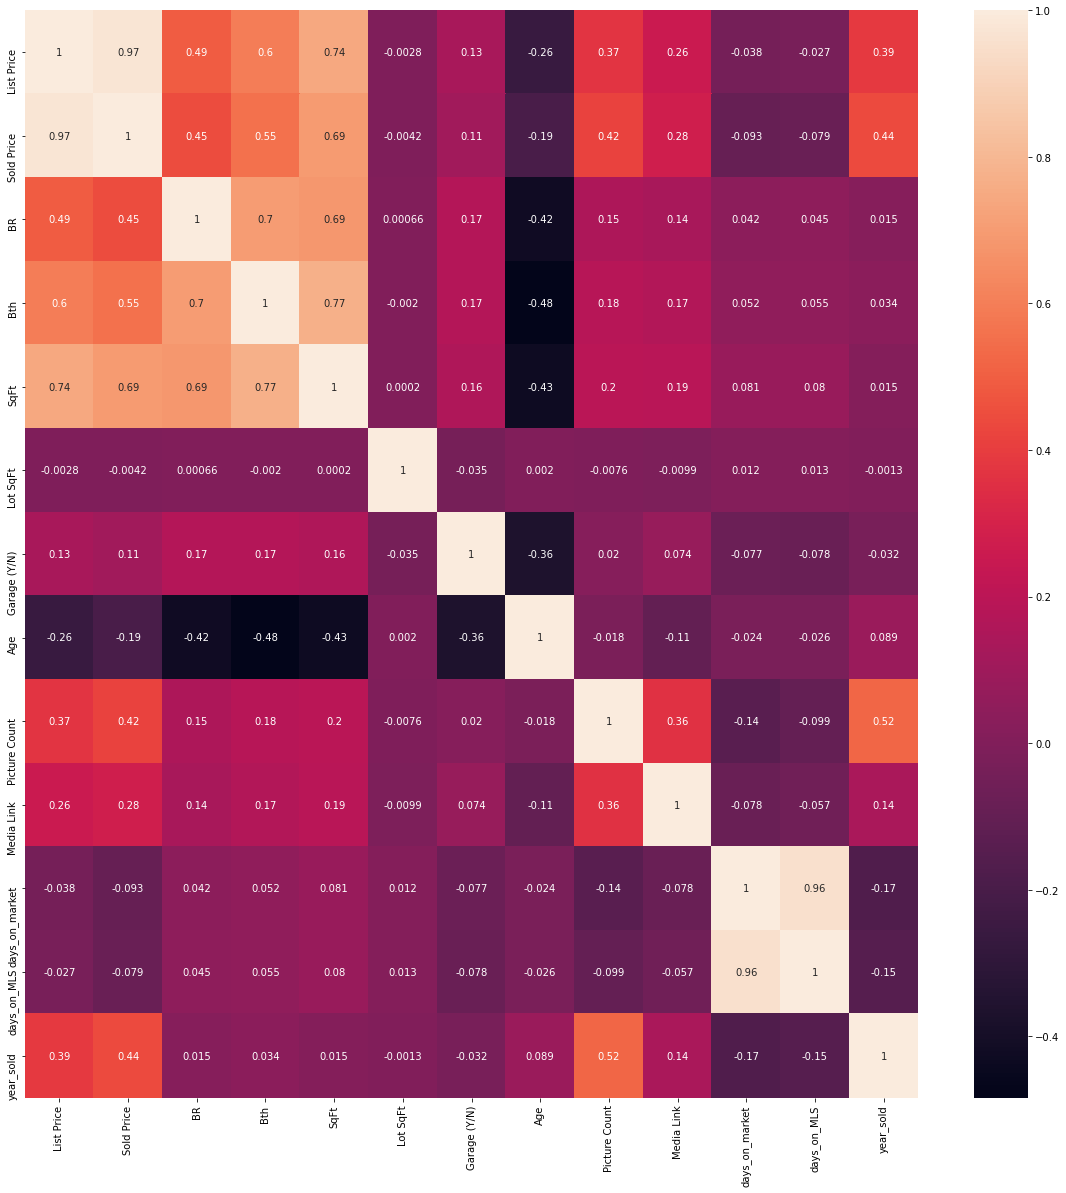

In [38]:
#Correlation heatmap
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(df.corr(), ax=ax, annot = True)

In [41]:
#Subseting data to create monthly aggregates sales
df['Sold'] = 1

df1 = df[['Sold', 'Closing Date']]

In [45]:
# Aggregating data to find the number of homes sold monthly
sold_monthly = pd.DataFrame(df1.set_index('Closing Date').resample('M').sum())

In [47]:
sold_monthly.head(20)

Sold
Closing Date      
2010-01-31      22
2010-02-28     256
2010-03-31     526
2010-04-30     539
2010-05-31     751
2010-06-30     738
2010-07-31     663
2010-08-31     570
2010-09-30     566
2010-10-31     574
2010-11-30     574
2010-12-31     620
2011-01-31     376
2011-02-28     315
2011-03-31     561
2011-04-30     577
2011-05-31     603
2011-06-30     713
2011-07-31     656
2011-08-31     675

In [48]:
sold_monthly = sold_monthly.reset_index()

sold_monthly['year'] = sold_monthly['Closing Date'].dt.year 

sold_monthly['month'] = sold_monthly['Closing Date'].dt.month



<AxesSubplot:xlabel='Closing Date', ylabel='Sold'>

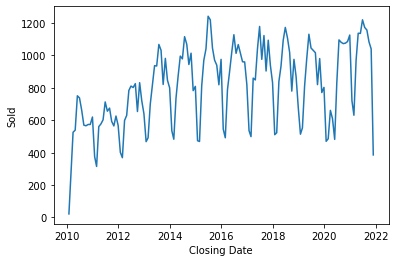

In [53]:
sns.lineplot(data=sold_monthly, x='Closing Date', y='Sold')

In [56]:
#Subsetting datet to find average prices
df2 = df[['Closing Date', 'Sold Price']]

In [60]:
# Aggregating data to find the average monthly price
monthly_avg_price = pd.DataFrame(df2.set_index('Closing Date').resample('M').mean().round())

In [61]:
monthly_avg_price.head()

Sold Price
Closing Date            
2010-01-31      675739.0
2010-02-28      589410.0
2010-03-31      585596.0
2010-04-30      613814.0
2010-05-31      594308.0

<AxesSubplot:xlabel='Closing Date', ylabel='Sold Price'>

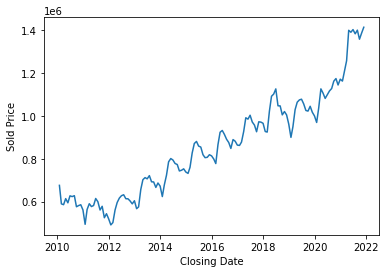

In [62]:
sns.lineplot(data=monthly_avg_price, x='Closing Date', y='Sold Price')

In [68]:
monthly_avg_price.to_csv("monthly_avg_price.csv")

<AxesSubplot:xlabel='Closing Date', ylabel='Picture Count'>

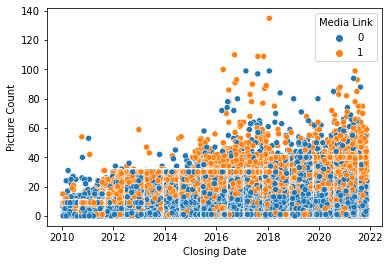

In [66]:
#Scatterplot of the number of photos over time, by media link
sns.scatterplot(data = df, x='Closing Date', y='Picture Count', hue = 'Media Link')

<AxesSubplot:xlabel='Media Link', ylabel='Sold Price'>

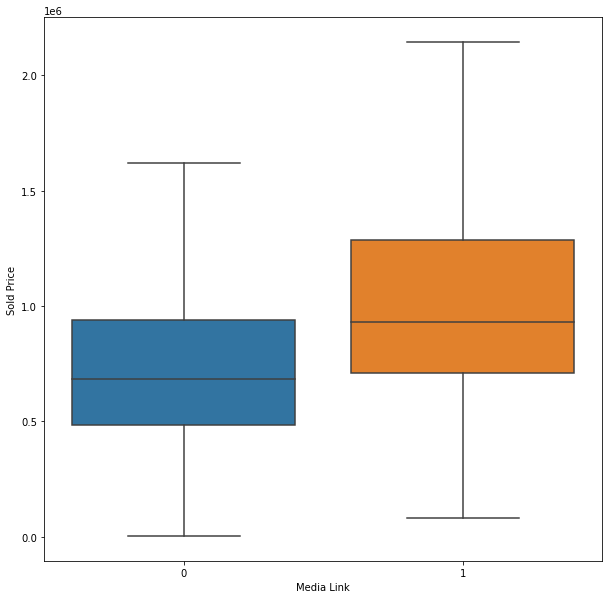

In [75]:
#Boxplot of sold price by media link, removing outliers
fig, ax = plt.subplots(figsize=(10,10)) 
sns.boxplot(data = df, x='Media Link', y='Sold Price', ax = ax, showfliers = False)

<AxesSubplot:xlabel='Picture Count', ylabel='Sold Price'>

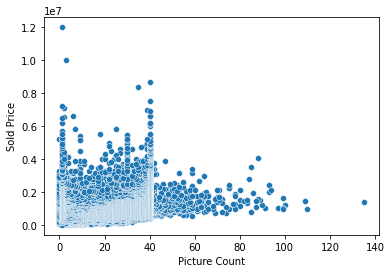

In [73]:
#Scatterplot of sold price and picture count
sns.scatterplot(data = df, x='Picture Count', y='Sold Price')

<AxesSubplot:>

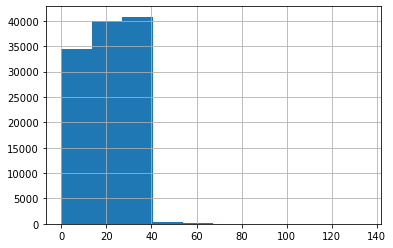

In [76]:
df['Picture Count'].hist()

In [89]:
#Creating a categorical variable for picture count
df['Picture_cat'] = pd.cut(df['Picture Count'], bins=[ 0, 10, 20, 30, 40, 60, 140], labels=['Up to 10', '11 to 20', '21 to 30', '31 to 40', '41 to 60', '60 or more'],  include_lowest=True)

In [90]:
df['Picture_cat'].value_counts()

21 to 30      39927
Up to 10      28273
11 to 20      26988
31 to 40      20007
41 to 60        461
60 or more       93
Name: Picture_cat, dtype: int64

In [91]:
df['Picture_cat'] = df['Picture_cat'].astype('category')

<AxesSubplot:xlabel='Picture_cat', ylabel='Sold Price'>

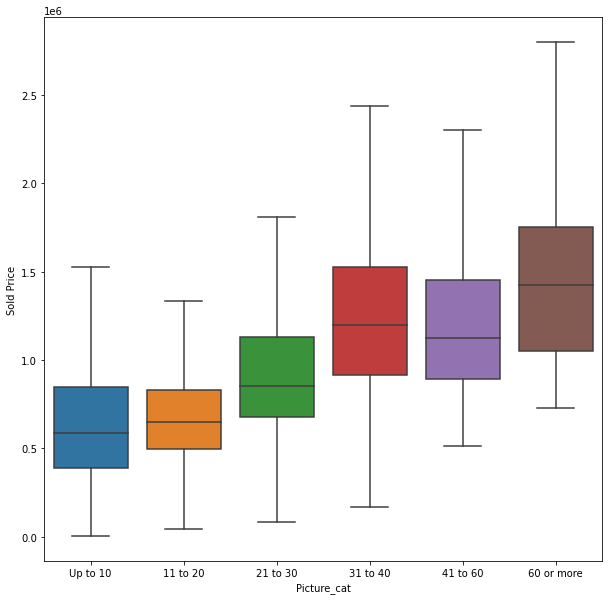

In [92]:
#Boxplot of sold price by number of photos, removing outliers
fig, ax = plt.subplots(figsize=(10,10)) 
sns.boxplot(data = df, x='Picture_cat', y='Sold Price', ax = ax, showfliers = False)